In [17]:
from aldiscore.scoring.pairwise import DPosDistance
from aldiscore.datastructures.alignment import Alignment
from aldiscore.datastructures.ensemble import Ensemble
from aldiscore.scoring import pythia
from Bio import AlignIO
from pathlib import Path
import os
import pandas as pd
import yaml

import seaborn as sn

<Axes: xlabel='pythia', ylabel='Count'>

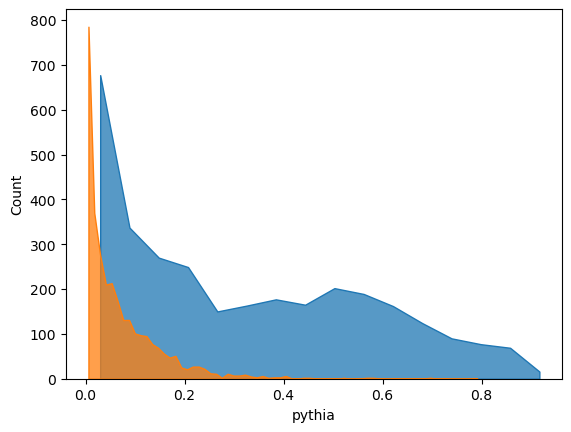

In [60]:
stats_path = Path("/hits/fast/cme/bodynems/data/paper/treebase_v1/stats.parquet")

stats = pd.read_parquet(stats_path)
stats.query("method == 'dpos'")[["mean"]]
plot_df = stats.reset_index()[["dataset", "mean", "datatype", "method"]]
plot_df = plot_df.pivot(index=["dataset", "datatype"], columns="method", values="mean")
plot_df = plot_df.reset_index()
plot_df
sn.histplot(plot_df, x="pythia", element="poly")
sn.histplot(plot_df, x="dpos", element="poly")

In [7]:
from ensemblify.utils import infer_data_type

raxml_path = yaml.safe_load(open("../configs/general.yaml", "r"))["general"]["raxml"]
raxml_path = Path(raxml_path)
ens_dir = Path("/hits/fast/cme/bodynems/data/paper/treebase_v1/26669_21.phy/ensemble")
alignments = []
for msa_file in os.listdir(ens_dir):
    alignment = Alignment(AlignIO.read(ens_dir / msa_file, "fasta"))
    alignments.append(alignment)

ensemble = Ensemble(alignments)
print(infer_data_type(ensemble.dataset.records))
measure = DPosDistance(format="matrix")
score = measure.compute(ensemble)
print(score.round(2))

phylo = pythia.compute_pythia_difficulty(ensemble, raxml_path)
phylo
# AlignIO.read()

DNA
[[0.   0.18 0.16 ... 0.38 0.24 0.24]
 [0.18 0.   0.12 ... 0.37 0.22 0.23]
 [0.16 0.12 0.   ... 0.37 0.22 0.22]
 ...
 [0.38 0.37 0.37 ... 0.   0.35 0.35]
 [0.24 0.22 0.22 ... 0.35 0.   0.05]
 [0.24 0.23 0.22 ... 0.35 0.05 0.  ]]


array([0.02176178, 0.06727879, 0.        , 0.03332001, 0.00522354,
       0.0204831 , 0.        , 0.02964685, 0.05595152, 0.01562015,
       0.02854705, 0.04865496, 0.00734299, 0.        , 0.01766098,
       0.        , 0.06014876, 0.11963331, 0.08604419, 0.04056716,
       0.01475421, 0.07771183, 0.03787192, 0.01806319, 0.02858778,
       0.07979305, 0.14668542, 0.00831519, 0.11490469, 0.        ,
       0.00218337, 0.03041175, 0.        , 0.04028905, 0.14668542,
       0.01124159, 0.12300378, 0.0505154 , 0.14729668, 0.03800844,
       0.01157072, 0.06211501, 0.01766098, 0.00592359, 0.02708872,
       0.17199208, 0.03557014, 0.01124159])